# 6. 計算氣候場及距平值

進行氣候分析時，最常從分析**氣候場 (Climatology)** 和**距平值 (Anomaly)** 開始。

## 利用`groupby`計算月氣候平均與距平

先準備資料。

In [1]:
import numpy as np
import pandas as pd
import xarray as xr 
from cartopy import crs as ccrs   
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import pyplot as plt
import cmaps 

# 選擇資料的時空範圍。
lats = -20
latn =  30
lon1 =  79 
lon2 = 161
time1 = '2017-12-01'
time2 = '2017-12-31'

# 開啟檔案
olr_ds = xr.open_dataset("data/olr.nc") 
olr = (olr_ds.sel(time=slice('1998-01-01','2016-12-31'),
                    lat=slice(lats,latn),
                    lon=slice(lon1,lon2)).olr)
olrrt = (olr_ds.sel(time=slice('2017-12-01','2017-12-31'),
                    lat=slice(lats,latn),
                    lon=slice(lon1,lon2)).olr)


我們在第4單元中，已經了解過如何在xarray中操控datetime物件，因此在計算氣候場的時候，也可以將資料按照各月分類，這種聚集並分類的函數稱為`groupby`。按照月份分類後，將同類的平均，就可以達到計算月平均氣候場的效果。

In [2]:
olrGB = olr.groupby("time.month")
olrMonClim = olrGB.mean("time")
olrMonClim

<xarray.DataArray 'olr' (month: 12, lat: 50, lon: 82)>
array([[[270.46304, 270.733  , 270.65674, ..., 257.25113, 256.66928,
         255.88481],
        [269.2497 , 268.8672 , 269.10608, ..., 253.4458 , 253.16606,
         252.612  ],
        [267.06586, 267.10168, 267.57956, ..., 249.25615, 248.41832,
         247.00958],
        ...,
        [257.96454, 257.9228 , 258.25717, ..., 256.99435, 256.7957 ,
         257.1389 ],
        [253.8876 , 253.44127, 252.49242, ..., 252.67389, 252.67773,
         252.66577],
        [245.34563, 240.01852, 228.33449, ..., 248.65154, 248.66853,
         248.4945 ]],

       [[266.90402, 267.24292, 267.5611 , ..., 255.47627, 254.07549,
         253.18782],
        [264.35114, 264.7394 , 264.8838 , ..., 251.78014, 251.39386,
         251.5901 ],
        [261.47485, 262.0324 , 262.2387 , ..., 247.40343, 248.10788,
         248.63504],
...
        [281.75525, 281.8884 , 282.38986, ..., 263.4137 , 263.9856 ,
         264.83353],
        [279.72992, 279.606  , 276.21066, ..., 257.44913, 258.6093 ,
         259.011  ],
        [270.86945, 264.80887, 252.71686, ..., 252.37294, 253.24257,
         254.25142]],

       [[277.68826, 277.9624 , 278.4138 , ..., 268.97824, 268.33755,
         267.38037],
        [276.8839 , 276.7246 , 277.1163 , ..., 267.85052, 267.2012 ,
         266.11276],
        [274.7251 , 274.73438, 275.10522, ..., 266.41324, 264.91357,
         264.28708],
        ...,
        [269.021  , 269.55536, 270.47003, ..., 258.9754 , 259.5015 ,
         260.0369 ],
        [266.66284, 267.0837 , 265.35526, ..., 253.46577, 253.8399 ,
         254.14174],
        [258.7795 , 254.24721, 243.1626 , ..., 248.40625, 248.42712,
         248.41476]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 79.5 80.5 81.5 82.5 83.5 ... 157.5 158.5 159.5 160.5
  * lat      (lat) float32 -19.5 -18.5 -17.5 -16.5 -15.5 ... 26.5 27.5 28.5 29.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

計算距平時，將即時(real time)的資料也對月份進行groupby，再直接減去氣候場即可，xarray會根據氣候場中的groupby分類進行計算。

In [3]:
olra = olrrt.groupby('time.month').mean() - olrMonClim
olra

<xarray.DataArray 'olr' (month: 1, lat: 50, lon: 82)>
array([[[ 9.782532  ,  9.909515  ,  8.493439  , ...,  2.4976807 ,
          1.3457642 , -0.74993896],
        [ 8.79599   ,  9.101593  ,  9.233643  , ...,  0.7164612 ,
         -0.66171265, -2.1524658 ],
        [ 7.641754  ,  9.022369  , 10.015686  , ...,  1.4698486 ,
         -0.8317261 , -3.6960144 ],
        ...,
        [-6.542267  , -5.305359  , -6.975708  , ..., 10.72287   ,
         12.2691345 , 13.606842  ],
        [-5.522644  , -5.337433  , -5.0462646 , ...,  7.494919  ,
          8.715576  ,  9.534225  ],
        [-5.7128754 , -4.664795  , -4.2814026 , ...,  4.3125763 ,
          5.6013947 ,  6.798218  ]]], dtype=float32)
Coordinates:
  * month    (month) int64 12
  * lon      (lon) float32 79.5 80.5 81.5 82.5 83.5 ... 157.5 158.5 159.5 160.5
  * lat      (lat) float32 -19.5 -18.5 -17.5 -16.5 -15.5 ... 26.5 27.5 28.5 29.5

我們把資料畫出來看看。

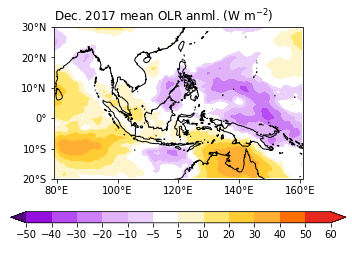

In [7]:
from matplotlib import pyplot as plt
from cartopy import crs as ccrs   
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmaps

proj = ccrs.PlateCarree() 
fig,ax = plt.subplots(1,1,subplot_kw={'projection':proj}) 
clevs = [-50,-40,-30,-20,-10,-5,5,10,20,30,40,50,60]
olrPlot = (olra[0,:,:]
               .plot.contourf("lon", "lat",              
                              transform=proj,     
                              ax=ax,            
                              levels=clevs,      
                              cmap=cmaps.sunshine_diff_12lev,     
                              add_colorbar=True,  
                              extend='both',  
                              cbar_kwargs={'orientation': 'horizontal', 'aspect': 30, 'label': ' ', 'ticks':clevs}) 
                              )

ax.set_extent([lon1,lon2,lats,latn],crs=proj)
ax.set_xticks(np.arange(80,180,20), crs=proj)
ax.set_yticks(np.arange(-20,40,10), crs=proj)   # 設定x, y座標的範圍，以及多少經緯度繪製刻度。
lon_formatter = LONGITUDE_FORMATTER
lat_formatter = LATITUDE_FORMATTER   
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)  # 將經緯度以degN, degE的方式表示。
ax.coastlines()                # 繪製地圖海岸線。                              
ax.set_ylabel(' ')             # 設定坐標軸名稱。
ax.set_xlabel(' ')
plt.title(' ')
plt.title("Dec. 2017 mean OLR anml. (W m$^{-2}$)", loc='left')  
plt.show()

## Homework1

```{admonition} Homework #1
:class: seealso
請自行選擇一時間，以xarray開啟資料、繪製CMORPH降雨的月氣候場和月距平。
1. 以`groupby`計算降雨的monthly climatology，可以自己選一個月畫。
2. 計算CMORPH降雨的月anomaly，可以自己選某年/月畫。

繪圖的經度範圍請先限制在0˚~180˚E。

繳交位置：[Google Classroom](https://classroom.google.com/c/NDUwNDY0OTY5NDc5?cjc=hv5ndug) 
```

## 計算日氣候平均與距平

datetime物件有`dayofyear`的attribute，那是不是利用`groupby('time.dayofyear')`就可以計算氣候場了呢？乍看之下，這是一個合理的作法，實際上這樣計算是不對的。由於datetime物件的日曆格式，一般年時dayofyear的範圍是1...365，但閏年時卻是1...366，因此同樣是3月1日，一般年的dayofyear是60，但閏年時卻是61，導致閏年的氣候場從3月1日開始相較於其它年會往後移動一天。

為了避免這個問題，可以參考[Stack Overflow問答](https://stackoverflow.com/questions/69784076/xarray-groupby-according-to-multi-indexs)這篇的作法，使用Multi-index groupby，也就是將日期用兩種index (即月、日) 分類，按照相同的月／日分群進行平均就可以得到日氣候場。而要在xarray中建立Multi-index通常使用pandas。

In [ ]:
grouper = xr.DataArray(
                    pd.MultiIndex.from_arrays(
                                             [olr.time.dt.month.values, olr.time.dt.day.values],
                                             names=['month', 'day']), 
                    dims=['time'], 
                    coords=[olr.time],
                   )
olrGB = olr.groupby(grouper)
olrDayClim = olrGB.mean()
olrDayClim 

<xarray.DataArray 'olr' (group: 365, lat: 50, lon: 82)>
array([[[275.55725, 276.54013, 277.6245 , ..., 266.42563, 261.806  ,
         256.9759 ],
        [271.42603, 273.49188, 275.55118, ..., 265.42078, 261.16055,
         258.88416],
        [269.327  , 272.37238, 274.97632, ..., 266.53256, 263.9792 ,
         260.42834],
        ...,
        [256.75238, 255.38774, 254.2091 , ..., 258.36227, 256.467  ,
         255.85205],
        [253.53944, 252.09026, 248.21413, ..., 254.66515, 253.68048,
         252.92639],
        [243.51398, 235.99913, 223.12405, ..., 252.18462, 251.65884,
         251.67668]],

       [[266.20474, 268.61728, 269.68546, ..., 270.8527 , 267.73373,
         265.09497],
        [264.37723, 268.11807, 272.91208, ..., 267.9069 , 267.9379 ,
         265.27835],
        [264.1134 , 269.25726, 272.4137 , ..., 265.53622, 266.38147,
         263.247  ],
...
        [251.53072, 252.98149, 255.76465, ..., 254.974  , 255.078  ,
         256.7515 ],
        [250.71375, 250.69159, 250.74278, ..., 247.6941 , 248.49252,
         249.42802],
        [247.05325, 242.05042, 228.88042, ..., 242.61388, 242.83165,
         242.44658]],

       [[278.8995 , 278.50262, 279.78247, ..., 266.84204, 260.77228,
         256.52045],
        [273.61664, 273.47092, 275.00528, ..., 264.8039 , 259.15552,
         256.94458],
        [269.77545, 270.2289 , 273.0708 , ..., 263.52734, 259.7732 ,
         259.5152 ],
        ...,
        [255.64618, 253.61989, 252.87695, ..., 254.2591 , 254.60645,
         255.94365],
        [250.28539, 250.46992, 247.14091, ..., 247.19354, 248.55852,
         247.40337],
        [243.3075 , 237.35382, 224.35126, ..., 243.6021 , 245.26956,
         244.68265]]], dtype=float32)
Coordinates:
  * lon            (lon) float32 79.5 80.5 81.5 82.5 ... 157.5 158.5 159.5 160.5
  * lat            (lat) float32 -19.5 -18.5 -17.5 -16.5 ... 26.5 27.5 28.5 29.5
  * group          (group) MultiIndex
  - group_level_0  (group) int64 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12
  - group_level_1  (group) int64 1 2 3 4 5 6 7 8 9 ... 24 25 26 27 28 29 30 31

同理，將即時的olr資料進行月/日分類，然後再減去氣候場，就可以得到距平值。

In [ ]:
# 另一組grouper。
grouper1 = xr.DataArray(
                    pd.MultiIndex.from_arrays(
                                             [olrrt.time.dt.month.values, olrrt.time.dt.day.values],
                                             names=['month', 'day']), 
                    dims=['time'], 
                    coords=[olrrt.time],
                   )
olrrtGB = olrrt.groupby(grouper1)

olra =  olrrtGB - olrDayClim
olra

<xarray.DataArray 'olr' (time: 31, lat: 50, lon: 82)>
array([[[ 13.704742  ,  15.109039  ,  12.878937  , ..., -54.183243  ,
         -73.50816   , -68.62732   ],
        [ 19.4534    ,  19.543701  ,  18.546417  , ..., -52.459534  ,
         -60.05954   , -50.794464  ],
        [ 24.460175  ,  23.976593  ,  23.317413  , ..., -47.908997  ,
         -50.70839   , -54.80072   ],
        ...,
        [ 15.7473755 ,  17.249847  ,  15.3532715 , ...,  23.260803  ,
          23.680878  ,  20.842041  ],
        [ 10.47052   ,   9.605225  ,   9.93811   , ...,  20.312744  ,
          21.57254   ,  19.565369  ],
        [  9.06192   ,  10.407959  ,   8.299484  , ...,  30.240723  ,
          26.335663  ,  28.194855  ]],

       [[ 12.072937  ,  12.46283   ,  11.166443  , ...,   3.3347168 ,
          -2.6916504 , -17.87941   ],
        [ 19.253326  ,  16.912842  ,  14.450348  , ...,  11.276276  ,
         -16.642563  , -24.29779   ],
        [ 27.846039  ,  25.520111  ,  20.153198  , ...,  19.735596  ,
          -9.782669  , -18.835938  ],
...
        [ 28.224808  ,  25.6931    ,  17.891449  , ...,   2.3854675 ,
          -1.5048676 ,  -9.9785    ],
        [ 31.848663  ,  29.524597  ,  23.120224  , ...,  -1.6407776 ,
          -3.447403  ,  -6.5221863 ],
        [ 30.846802  ,  25.651093  ,  22.978333  , ...,   3.4666443 ,
          -3.4124146 ,  -2.3715515 ]],

       [[ 15.812683  ,  24.250153  ,  24.052948  , ...,  -6.747101  ,
          10.188721  ,   8.011688  ],
        [ 20.912537  ,  26.442352  ,  25.50885   , ...,  -4.7691345 ,
          12.966644  ,  14.544464  ],
        [ 20.990875  ,  24.864563  ,  22.321167  , ...,   7.733551  ,
          21.59375   ,  27.109741  ],
        ...,
        [ 15.216705  ,  11.739304  ,   9.068085  , ...,  14.774506  ,
          14.711273  ,  20.791306  ],
        [ 17.75206   ,  15.910721  ,   7.664337  , ...,  14.993011  ,
          20.03865   ,  22.741257  ],
        [ 14.902161  ,  10.4882965 ,   9.08168   , ...,  13.184586  ,
          12.378693  ,  11.702148  ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2017-12-01 2017-12-02 ... 2017-12-31
  * lon      (lon) float32 79.5 80.5 81.5 82.5 83.5 ... 157.5 158.5 159.5 160.5
  * lat      (lat) float32 -19.5 -18.5 -17.5 -16.5 -15.5 ... 26.5 27.5 28.5 29.5
    group    (time) object (12, 1) (12, 2) (12, 3) ... (12, 30) (12, 31)

得到的距平場`olra`的時空範圍和`olr`完全一樣。

## 計算「平滑」氣候場

平滑氣候場是保留氣候場的前*n*個諧函數 (harmonics)，必須運用傅立葉變換 (fast Fourier transform, FFT) 計算。計算FFT需要用到`scipy`函式庫。然而由於`scipy`目前尚不支援`xarray.DataArray`，因此必須先轉換成`numpy.ndarray`才能進行FFT運算，或是利用[`xrft` (Fourier transforms for xarray data)](https://xrft.readthedocs.io/en/latest/)模組。下列程式碼`smthClmDay`函數和NCL完全一樣。

In [ ]:
from scipy.fft import rfft, irfft

def smthClmDay(clmDay, nHarm):
    nt, ny, nx = clmDay.shape
    cf = rfft(clmDay.values, axis=0)     # xarray.DataArray.values 可將DataArray 轉換成numpy.ndarray。
    cf[nHarm,:,:] = 0.5*cf[nHarm,:,:]    # mini-taper.
    cf[nHarm+1:,:,:] = 0.0               # set all higher coef to 0.0
    icf = irfft(cf, n=nt, axis=0)       # reconstructed series
    clmDaySmth = clmDay.copy(data=icf, deep=False)
    return(clmDaySmth)

olrDayClim_sm = smthClmDay(olrDayClim, 3)
olrDayClim_sm

<xarray.DataArray 'olr' (group: 365, lat: 50, lon: 82)>
array([[[273.73758, 274.0422 , 274.22583, ..., 262.1469 , 261.3419 ,
         260.44742],
        [272.51013, 272.33408, 272.71866, ..., 259.94437, 259.43707,
         258.5984 ],
        [270.3036 , 270.4219 , 270.9087 , ..., 257.22073, 256.27808,
         255.40192],
        ...,
        [260.58185, 261.00766, 261.77307, ..., 257.89032, 257.99857,
         258.42892],
        [257.39386, 257.66815, 256.63403, ..., 252.69131, 252.87325,
         252.9706 ],
        [249.57874, 245.21857, 234.24344, ..., 247.9486 , 248.0118 ,
         247.96251]],

       [[273.59213, 273.897  , 274.07825, ..., 261.8383 , 261.04956,
         260.1708 ],
        [272.35675, 272.17444, 272.55368, ..., 259.5936 , 259.11523,
         258.31168],
        [270.1407 , 270.25354, 270.7333 , ..., 256.83228, 255.92749,
         255.07533],
...
        [261.40015, 261.8564 , 262.6492 , ..., 258.01334, 258.14487,
         258.5891 ],
        [258.2655 , 258.56372, 257.49673, ..., 252.74413, 252.95432,
         253.06636],
        [250.44743, 246.07487, 235.07372, ..., 247.94408, 248.0243 ,
         248.0026 ]],

       [[273.881  , 274.18527, 274.37152, ..., 262.4558 , 261.6341 ,
         260.72357],
        [272.66092, 272.4917 , 272.88168, ..., 260.2942 , 259.75745,
         258.88367],
        [270.46375, 270.5879 , 271.08167, ..., 257.60733, 256.62665,
         255.72672],
        ...,
        [260.983  , 261.42422, 262.20358, ..., 257.94974, 258.0696 ,
         258.5069 ],
        [257.82196, 258.10837, 257.05884, ..., 252.71556, 252.91156,
         253.01624],
        [250.00673, 245.64146, 234.65436, ..., 247.94424, 248.01578,
         247.98015]]], dtype=float32)
Coordinates:
  * lon            (lon) float32 79.5 80.5 81.5 82.5 ... 157.5 158.5 159.5 160.5
  * lat            (lat) float32 -19.5 -18.5 -17.5 -16.5 ... 26.5 27.5 28.5 29.5
  * group          (group) MultiIndex
  - group_level_0  (group) int64 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12
  - group_level_1  (group) int64 1 2 3 4 5 6 7 8 9 ... 24 25 26 27 28 29 30 31

選取澳洲季風區，繪製氣候的時序圖。

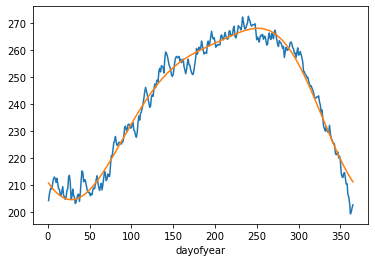

In [ ]:
nt, ny, nx = olrDayClim.shape
olrDayClim1 = xr.DataArray(data=olrDayClim.values, 
                           dims=['dayofyear','lat','lon'],
                           coords=dict(dayofyear=range(1,nt+1),
                                       lat=olrDayClim.lat,
                                       lon=olrDayClim.lon)) 
olrDayClim_sm1 = xr.DataArray(data=olrDayClim_sm.values, 
                              dims=['dayofyear','lat','lon'],
                              coords=dict(dayofyear=range(1,nt+1),
                                          lat=olrDayClim.lat,
                                          lon=olrDayClim.lon)) 

plt.figure()                   
(olrDayClim1.sel(lon=slice(115,150),lat=slice(-15,-2))
            .mean(["lat","lon"])
            .plot.line(x="dayofyear"))
(olrDayClim_sm1.sel(lon=slice(115,150),lat=slice(-15,-2))
               .mean(["lat","lon"])
               .plot.line(x="dayofyear"))
plt.show()

上圖藍線的部分為原始的氣候場，橘線的部分則是保留前三個諧函數的氣候場，縱軸為OLR，橫軸則是一年之中的天數。

## 自定義函式庫

以上的手續其實略嫌繁瑣，因此如果可以直接建立一個自建函式庫檔案 (例如命名為`clim_and_anml.py`)，放在執行程式的資料夾，或是放在Python site package資料夾中：
- 使用工作站：`~/.local/lib/pythonX.X/site-packages`。
- 用Mac: `/Users/waynetsai/opt/anaconda3/envs/p3/lib/python3.9/site-packages`。

之後就可以直接import進任何程式使用。例如：

```
import clim_and_anml as clm
```

以下是寫好的函式範例：

In [ ]:
import xarray as xr 
import numpy as np
import pandas as pd
from scipy.fft import rfft, irfft

def clmDayTLL(data, multiindex=None):
    #### If multiindex == true, retain the original multiindex coordinates.
    #### If not, create another "day_of_year" coordinate.
    #### If calcDayAnom are about to be applied, multiindex == true is suggested. 
    grouper = xr.DataArray(
                        pd.MultiIndex.from_arrays(
                                                 [data.time.dt.month.values, data.time.dt.day.values],
                                                 names=['month', 'day']), 
                        dims=['time'], 
                        coords=[data.time],
                       )
    dataGB = data.groupby(grouper).mean()
    
    if (multiindex==True): 
       clmDay = dataGB 
    if (multiindex==False): 
        # convert to [day_of_year, lat, lon].
        nt, ny, nx = dataGB.shape
        clmDay = xr.DataArray(data=dataGB.values, 
                              dims=['time','lat','lon'],
                              coords=dict(day_of_year=range(1,nt+1),
                                          lat=dataGB.lat,
                                          lon=dataGB.lon)) 
    return(clmDay)

def smthClmDay(clmDay, nHarm):
    nt, ny, nx = clmDay.shape
    cf = rfft(clmDay.values, axis=0)     # xarray.DataArray.values 可將DataArray 轉換成numpy.ndarray。
    cf[nHarm,:,:] = 0.5*cf[nHarm,:,:]    # mini-taper.
    cf[nHarm+1:,:,:] = 0.0               # set all higher coef to 0.0
    icf = irfft(cf, n=nt, axis=0)       # reconstructed series
    clmDaySmth = clmDay.copy(data=icf, deep=False)
    return(clmDaySmth)

def calcDayAnom(data, daily_clim): 
    ### The climatology should be MultiIndex!! 
    grouper = xr.DataArray(
                        pd.MultiIndex.from_arrays(
                                                 [data.time.dt.month.values, data.time.dt.day.values],
                                                 names=['month', 'day']), 
                        dims=['time'], 
                        coords=[data.time],
                       )
    dataGB = data.groupby(grouper) 
    anml = data.copy(data=(dataGB - daily_clim), deep=False)
    
    return(anml)
    

測試一下：

In [ ]:
import clim_and_anml as clm

olrDayClim = clm.clmDayTLL(olr,multiindex=True)
olrDayClim_sm = clm.smthClmDay(olrDayClim,3)
olra = clm.calcDayAnom(olrrt,olrDayClim_sm )
olra

<xarray.DataArray 'olr' (time: 31, lat: 50, lon: 82)>
array([[[ 13.264282  ,  13.212677  ,  11.581451  , ..., -63.01619   ,
         -83.05617   , -78.62909   ],
        [ 17.61679   ,  16.774902  ,  15.51123   , ..., -63.084747  ,
         -71.12164   , -61.567947  ],
        [ 18.445618  ,  18.254364  ,  17.566833  , ..., -58.280243  ,
         -60.86418   , -65.96219   ],
        ...,
        [ 10.069153  ,  11.611969  ,  10.430634  , ...,  29.747955  ,
          30.284424  ,  27.255768  ],
        [  6.7269897 ,   6.883667  ,   6.724365  , ...,  27.633423  ,
          28.30017   ,  26.13556   ],
        [  5.889679  ,   8.118469  ,   7.4954834 , ...,  33.550064  ,
          30.950912  ,  33.3685    ]],

       [[ 10.259674  ,  10.760345  ,   8.994598  , ...,  -1.3888245 ,
          -6.4214478 , -24.130997  ],
        [ 14.941589  ,  13.30307   ,  11.33078   , ...,   6.2304993 ,
         -22.165634  , -30.853668  ],
        [ 21.68805   ,  22.971344  ,  19.063568  , ...,  11.927582  ,
         -20.880661  , -29.70192   ],
...
        [ 18.355377  ,  16.818176  ,  11.006897  , ...,  -0.6538696 ,
          -4.5717316 , -11.816116  ],
        [ 24.296906  ,  21.652466  ,  16.366272  , ...,  -6.690796  ,
          -7.909195  , -10.160522  ],
        [ 27.452621  ,  21.626633  ,  16.785034  , ...,  -1.8635559 ,
          -8.605072  ,  -7.9275665 ]],

       [[ 20.831177  ,  28.567505  ,  29.463898  , ...,  -2.3608704 ,
           9.326904  ,   3.8085632 ],
        [ 21.868256  ,  27.42157   ,  27.632446  , ...,  -0.25942993,
          12.364716  ,  12.605377  ],
        [ 20.302582  ,  24.505585  ,  24.310303  , ...,  13.653564  ,
          24.740295  ,  30.898224  ],
        ...,
        [  9.879883  ,   3.934967  ,  -0.25854492, ...,  11.083862  ,
          11.248108  ,  18.228058  ],
        [ 10.215485  ,   8.272278  ,  -2.2535858 , ...,   9.470993  ,
          15.685608  ,  17.128387  ],
        [  8.202927  ,   2.200653  ,  -1.2214203 , ...,   8.842438  ,
           9.632477  ,   8.404648  ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2017-12-01 2017-12-02 ... 2017-12-31
  * lon      (lon) float32 79.5 80.5 81.5 82.5 83.5 ... 157.5 158.5 159.5 160.5
  * lat      (lat) float32 -19.5 -18.5 -17.5 -16.5 -15.5 ... 26.5 27.5 28.5 29.5
Attributes:
    standard_name:  toa_outgoing_longwave_flux
    long_name:      NOAA Climate Data Record of Daily Mean Upward Longwave Fl...
    units:          W m-2
    cell_methods:   time: mean area: mean

<Figure size 432x288 with 0 Axes>

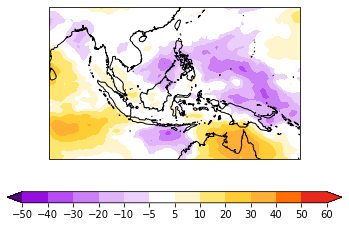

In [ ]:
plt.figure()
fig,ax = plt.subplots(1,1,subplot_kw={'projection':proj}) 
clevs = [-50,-40,-30,-20,-10,-5,5,10,20,30,40,50,60]
olrPlot = (olra.mean(axis=0)
               .plot.contourf("lon", "lat",              
                              transform=proj,     
                              ax=ax,            
                              levels=clevs,      
                              cmap=cmaps.sunshine_diff_12lev,     
                              add_colorbar=True,  
                              extend='both',  
                              cbar_kwargs={'orientation': 'horizontal', 'aspect': 30, 'label': ' ', 'ticks':clevs}) 
                              )
ax.coastlines()
plt.show()